# **3.Tranformada Rápida de Fourier a través del método de Radix.**<br>
*** 
- Elaboró:
<br> Santa Fe Garcia, Braulio Leonardo

La transformada rapida de fourier es un método que ahorra el costo computacional de calcular la transformada de fourier convecional, se puede calcular con diferentes métodos pero aqui abarcaremos el método Radix2. 
En este método se separan los elementos pares de los impares y se calculan las transformadas discretas de Fourier para pares e impares, considerando una funcion exponencial auxiliar. 
Por ultimo se calcula la suma de ambas transformadas, para hacer la transformada de la funcion completa. 


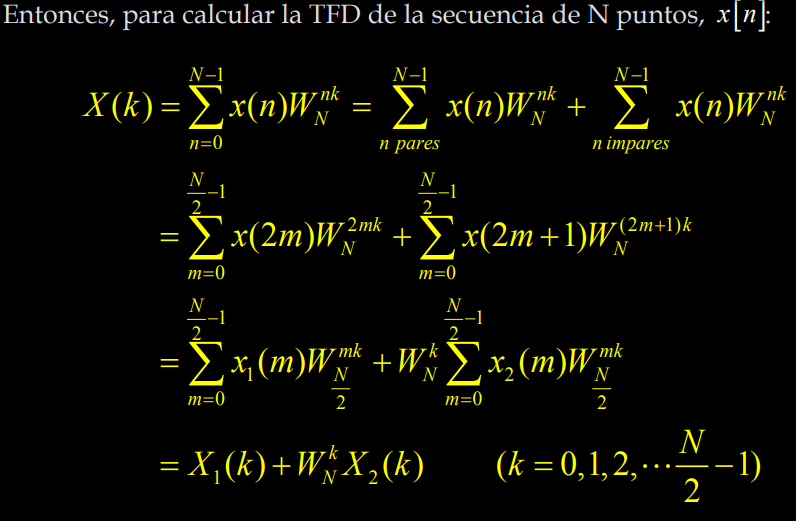
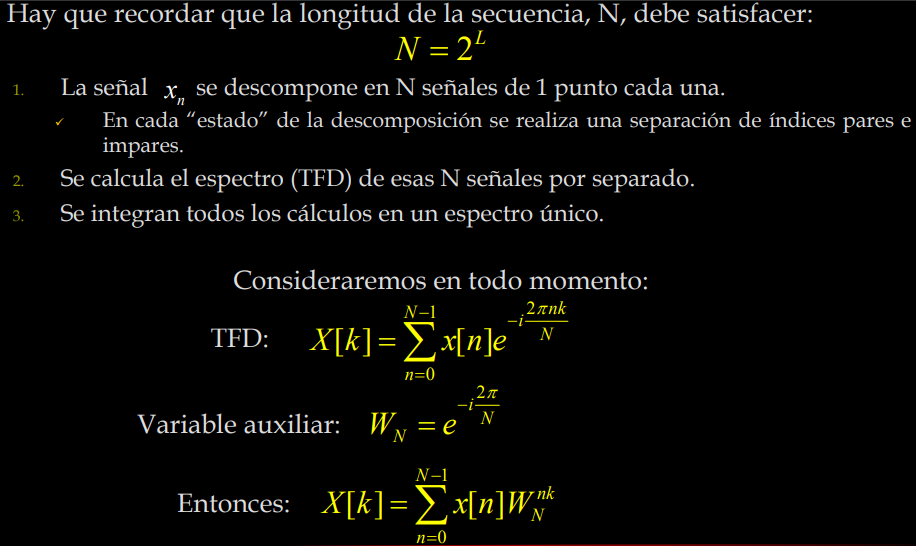

***
## **_1.Calulando la FFT con el método de Radix para N=16._** <br>



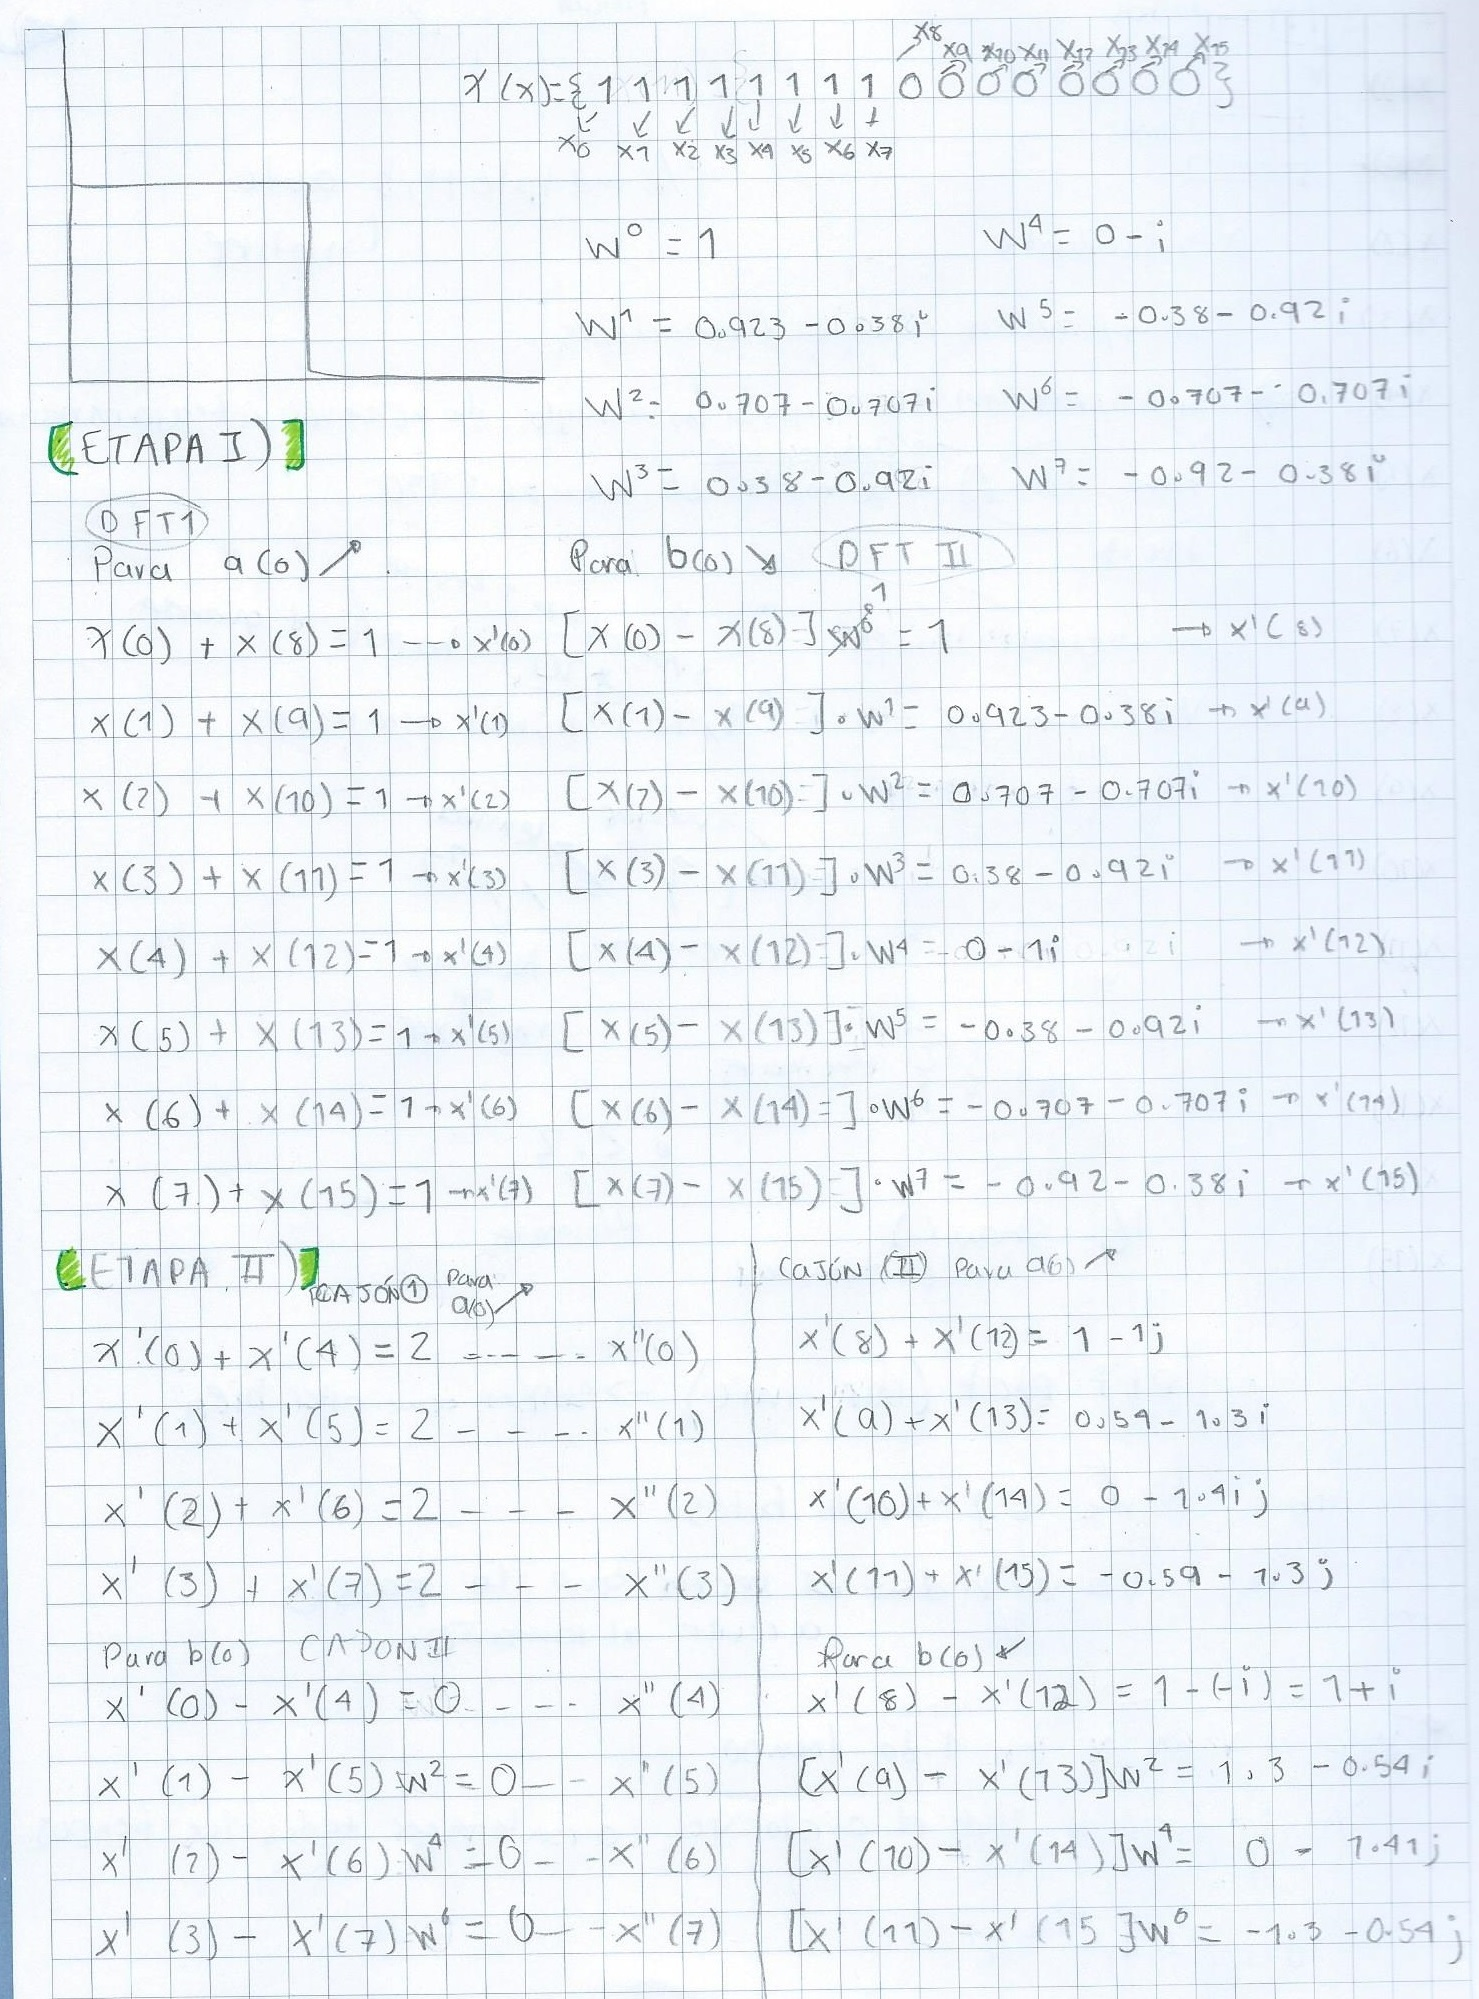

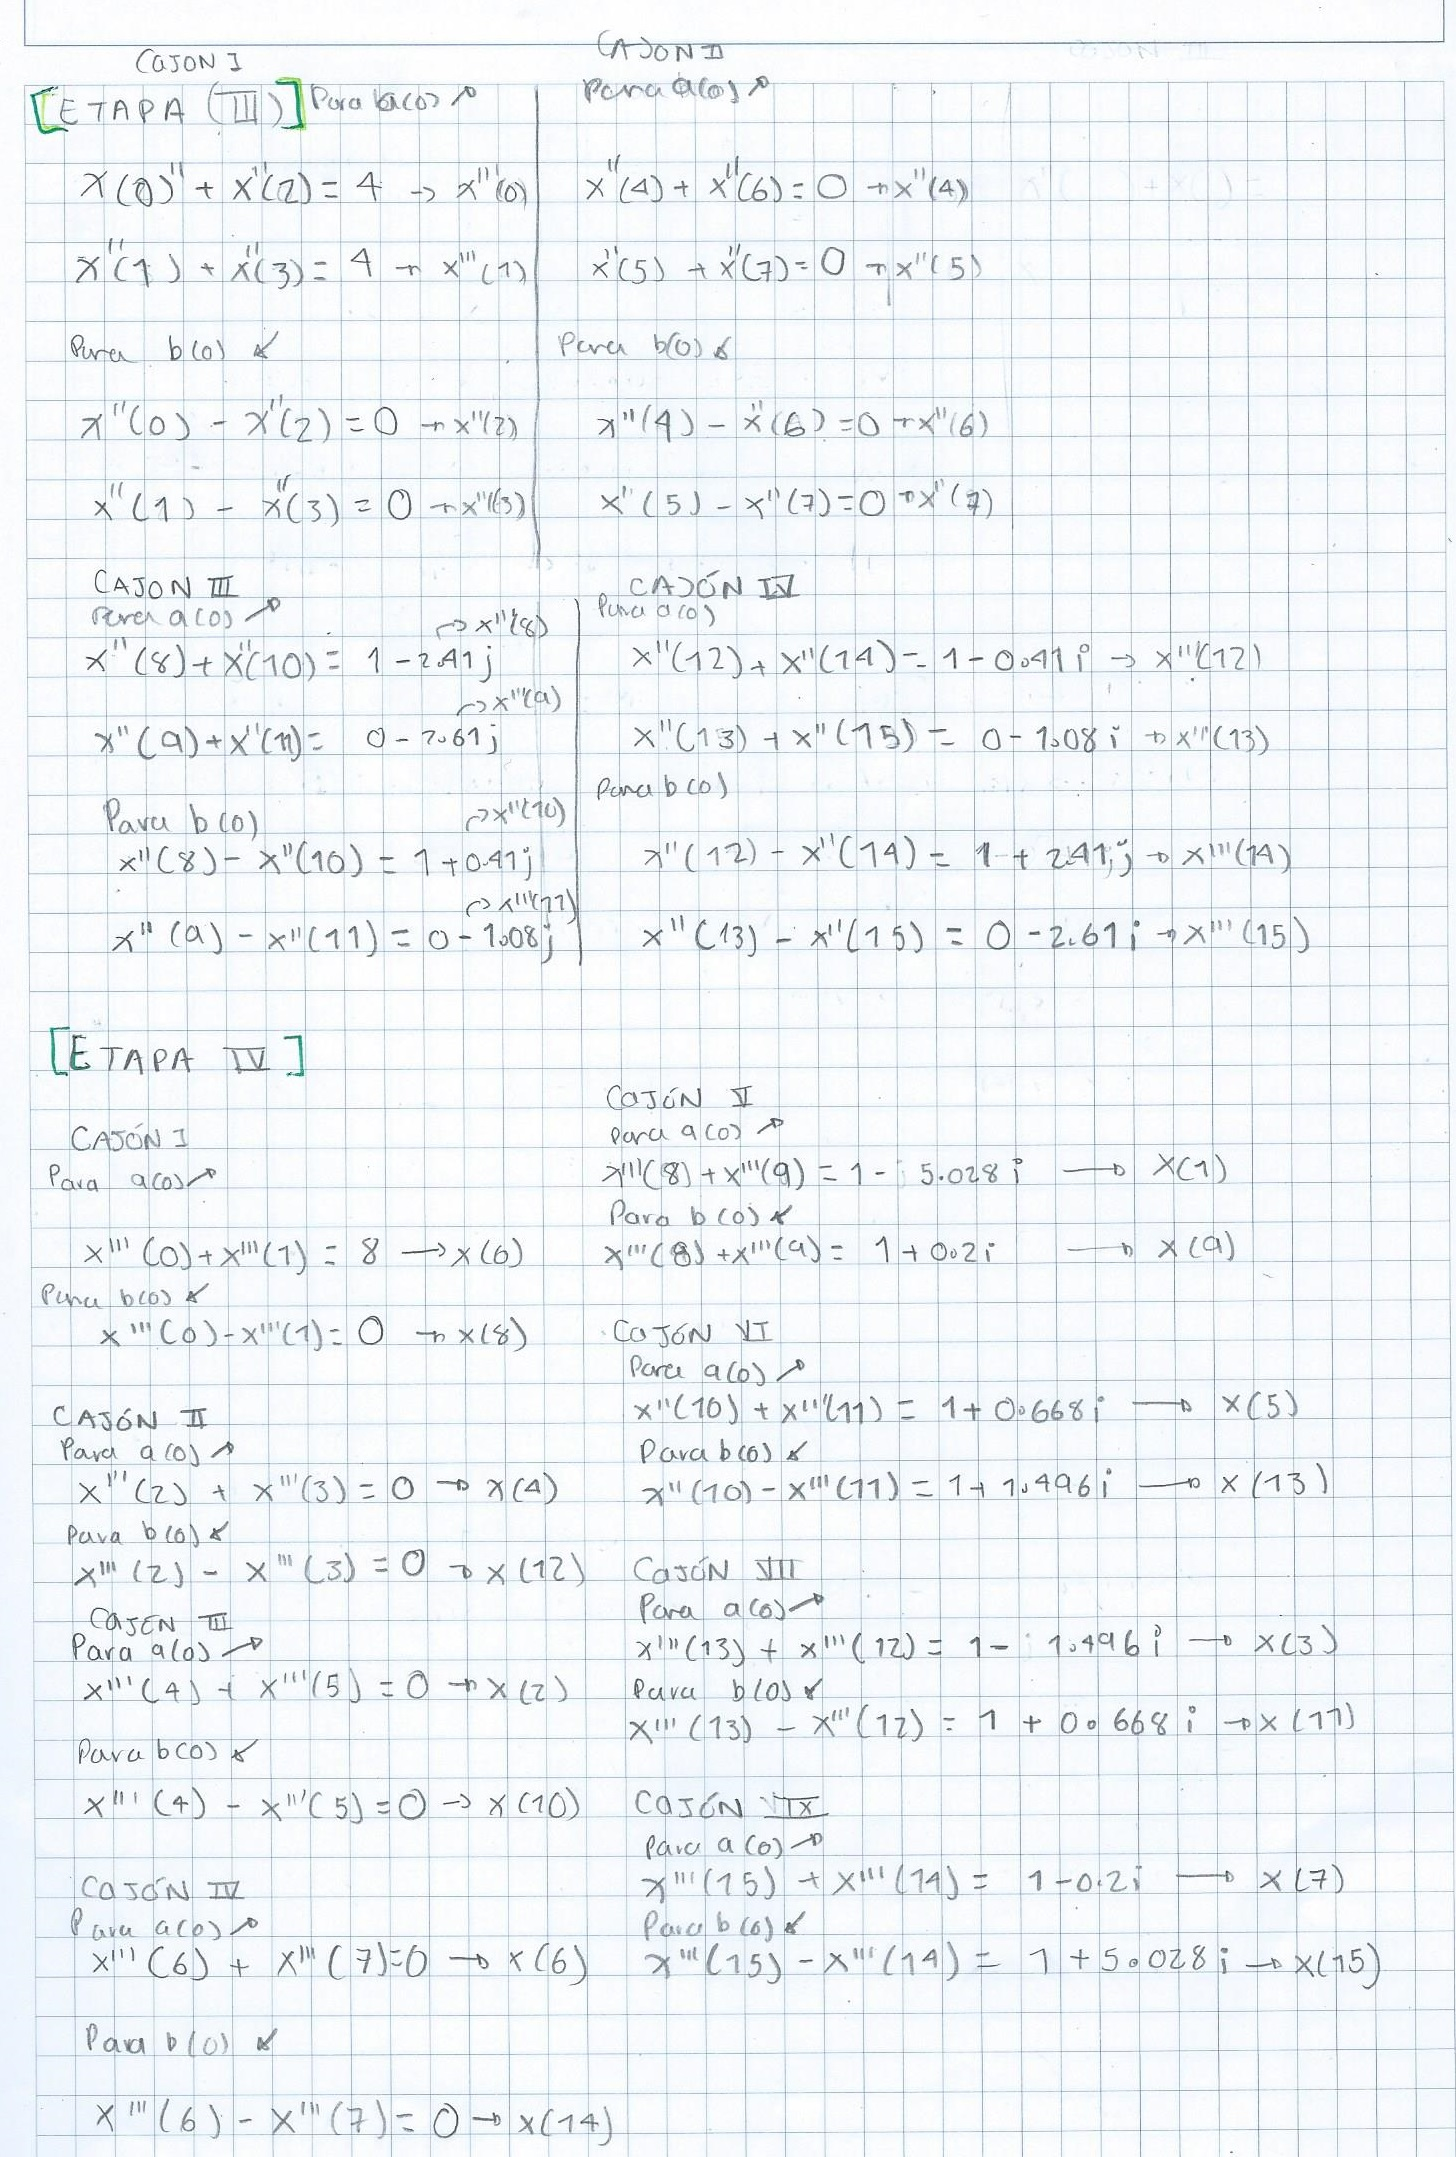

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
N=2**4
#programamos la constante de twiddle 
W=lambda k:np.exp(-1j*2*np.pi*k/N) 
x=[1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,]
y=np.zeros(np.size(x), dtype=complex)

z=np.zeros(8, dtype=complex)
z2=np.zeros(8, dtype=complex)
z3=np.zeros(4, dtype=complex)
z4=np.zeros(4, dtype=complex)
z5=np.zeros(4, dtype=complex)
z6=np.zeros(4, dtype=complex)

t1=np.zeros(2, dtype=complex)
t2=np.zeros(2, dtype=complex)
t3=np.zeros(2, dtype=complex)
t4=np.zeros(2, dtype=complex)
t5=np.zeros(2, dtype=complex)
t6=np.zeros(2, dtype=complex)
t7=np.zeros(2, dtype=complex)
t8=np.zeros(2, dtype=complex)

u1=np.zeros(1, dtype=complex)
u2=np.zeros(1, dtype=complex)
u3=np.zeros(1, dtype=complex)
u4=np.zeros(1, dtype=complex)
u5=np.zeros(1, dtype=complex)
u6=np.zeros(1, dtype=complex)
u7=np.zeros(1, dtype=complex)
u8=np.zeros(1, dtype=complex)
u9=np.zeros(1, dtype=complex)
u10=np.zeros(1, dtype=complex)
u11=np.zeros(1, dtype=complex)
u12=np.zeros(1, dtype=complex)
u13=np.zeros(1, dtype=complex)
u14=np.zeros(1, dtype=complex)
u15=np.zeros(1, dtype=complex)
u15=np.zeros(1, dtype=complex)


M=int(N/2.)


## **_2.Calculando la ETAPA 02_** <br>
***

### Este programa calcula la etapa 02 del método de Radix:<br>



In [3]:
#ETAPA -- 1 --
#construimos x(k) para pares
for k in range (0,int(N/2)):
    x[k]=x[k]+x[k+int(N/2)]
z=x[0:8]
print(z)

[1, 1, 1, 1, 1, 1, 1, 1]


In [4]:
#construimos x(k) para impares
for n in range (0,int(N/2.)):
    y[n]=(x[n]-x[n+int(N/2.)])*W(n)
z2=y[0:8]
print(z2)

[ 1.00000000e+00+0.j          9.23879533e-01-0.38268343j
  7.07106781e-01-0.70710678j  3.82683432e-01-0.92387953j
  6.12323400e-17-1.j         -3.82683432e-01-0.92387953j
 -7.07106781e-01-0.70710678j -9.23879533e-01-0.38268343j]


## **_3. Calculando la ETAPA 02_** <br>
***

### Este programa calcula la etapa 02 del método de Radix:<br>

In [5]:
#ETAPA --2 -- 
#para la parte par
for k in range (0,int(N/4)):
    z3[k]=z[k]+z[k+int(N/4)]
print(z3)



[2.+0.j 2.+0.j 2.+0.j 2.+0.j]


In [6]:
#para la parte impar
for k in range (0,8,2):
    for n in range (0,int(N/4.)):
        z4[n]=(z[n]-z[n+int(N/4.)])*W(k)
print(z4)

[0.-0.j 0.-0.j 0.-0.j 0.-0.j]


In [7]:
#para la parte par
for k in range (0,int(N/4.)):
    z5[k]=z2[k]+z2[k+int(N/4.)]
    print(z5[k])

(1-1j)
(0.541196100146197-1.3065629648763766j)
(1.1102230246251565e-16-1.4142135623730951j)
(-0.5411961001461969-1.3065629648763766j)


In [8]:
k=0;
for n in range (0,int(N/4)):
    z6[n]=(z2[n]-z2[n+int(N/4)])*W(k)
    k=2+k
print(z6)

[ 1.00000000e+00+1.j          1.30656296e+00-0.5411961j
  8.65956056e-17-1.41421356j -1.30656296e+00-0.5411961j ]


## **_4.Calculando la ETAPA 03_** <br>
***

### Este programa calcula la etapa 03 del método de Radix:<br>

In [9]:
#ETAPA --3 -- 
#para la parte par
for k in range (0,int(N/6)):
    t1[k]=z3[k]+z3[k+int(N/6)]
print(t1)

[4.+0.j 4.+0.j]


In [10]:
#para la parte impar
for k in range (0,5,4):
    for n in range (0,int(N/6)):
        t2[n]=(z3[n]-z3[n+int(N/6)])*W(k)
print(t2)

[0.+0.j 0.+0.j]


In [11]:
#para la parte par
for k in range (0,int(N/6)):
    t3[k]=z4[k]+z4[k+int(N/6)]
print(t3)

[0.-0.j 0.-0.j]


In [12]:
#para la parte impar
for k in range (0,5,4):
    for n in range (0,int(N/6)):
        t4[n]=(z4[n]-z4[n+int(N/6)])*W(k)
print(t4)

[0.+0.j 0.+0.j]


In [13]:
#para la parte par
for k in range (0,int(N/6)):
    t5[k]=z5[k]+z5[k+int(N/6)]
print(t5)

[1.00000000e+00-2.41421356j 1.11022302e-16-2.61312593j]


In [14]:
k=0;
for n in range (0,int(N/6)):
    t6[n]=(z5[n]-z5[n+int(N/6)])*W(k)
    k=4+k
print(t6)

[1.00000000e+00+0.41421356j 6.62774072e-17-1.0823922j ]


In [15]:
#para la parte par
for k in range (0,int(N/6)):
    t7[k]=z6[k]+z6[k+int(N/6)]
print(t7)

[1.-0.41421356j 0.-1.0823922j ]


In [16]:
#para la parte impar
k=0;
for n in range (0,int(N/6)):
    t8[n]=(z6[n]-z6[n+int(N/6)])*W(k)
    k=4+k
print(t8)


[1.00000000e+00+2.41421356j 1.60007815e-16-2.61312593j]


## **_5.Calculando la ETAPA 04_** <br>
***

### Este programa calcula la etapa 04 del método de Radix:<br>

In [17]:
#ETAPA -- 4--
#para la parte par
u1=t1[0]+t1[1]
u2=t1[0]-t1[1]
u3=t2[0]+t2[1]
u4=t2[0]-t2[1]
u5=t3[0]+t3[1]
u6=t3[0]-t3[1]
u7=t4[0]+t4[1]
u8=t4[0]-t4[1]
u9=t5[0]+t5[1]
u10=t5[0]-t5[1]
u11=t6[0]+t6[1]
u12=t6[0]-t6[1]
u13=t7[0]+t7[1]
u14=t7[0]-t7[1]
u15=t8[0]+t8[1]
u16=t8[0]-t8[1]

dft=[u1,u9,u5,u13,u3,u11,u7,u15,u2,u10,u6,u14,u4,u12,u8,u16,]
print(dft)

[(8+0j), (1-5.027339492125848j), -0j, (1-1.4966057626654892j), 0j, (1-0.6681786379192987j), 0j, (0.9999999999999999-0.19891236737965823j), 0j, (0.9999999999999999+0.19891236737965823j), 0j, (1+0.6681786379192993j), 0j, (0.9999999999999998+1.496605762665489j), 0j, (0.9999999999999997+5.027339492125848j)]


In [18]:
FFT=np.fft.fft(x)
print(FFT)

[8.+0.j         1.-5.02733949j 0.+0.j         1.-1.49660576j
 0.+0.j         1.-0.66817864j 0.+0.j         1.-0.19891237j
 0.+0.j         1.+0.19891237j 0.+0.j         1.+0.66817864j
 0.+0.j         1.+1.49660576j 0.+0.j         1.+5.02733949j]
